<a href="https://colab.research.google.com/github/amilsiddik/Deep-Learning/blob/main/coba%20leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dir = '/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases'

In [4]:
import os

File=[]
for file in os.listdir(dir):
    File+=[file]
print(File)

['Brown spot', 'Leaf smut', 'Bacterial leaf blight']


In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

dataset=[]
mapping={'Bacterial_Leaf_Blight':0, 'Brown_Spot':1, 'Leaf_Smut':2}
count=0

for file in os.listdir(dir):
    path=os.path.join(dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1

In [6]:
import numpy as np
from tensorflow.keras.utils import to_categorical

data,labels0=zip(*dataset) 
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(120, 224, 224, 3)
(120, 3)


In [7]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(data,labels,test_size=0.2,random_state=13)

In [8]:
ter = np.argmax(test_y, axis=1)

In [9]:
np.unique(ter, return_counts=True)

(array([0, 1, 2]), array([8, 8, 8]))

In [10]:
len(train_x), len(test_x)

(96, 24)

In [11]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(96, 224, 224, 3)
(24, 224, 224, 3)
(96, 3)
(24, 3)


In [14]:
# Directory with our Bacterial Leaf Blight pictures
train_bacterial_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Bacterial leaf blight')

# Directory with our Brown Spot pictures
train_brown_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Brown spot')

# Directory with our Leaf Smut pictures
train_leaf_dir = os.path.join('/content/drive/MyDrive/Percobaan/Dataset1/rice_leaf_diseases/Leaf smut')

In [15]:
train_bacterial_names = os.listdir(train_bacterial_dir)
print("File names in Bacterial Leaf Blight directory:")
print(train_bacterial_names[:10])

train_brown_names = os.listdir(train_brown_dir)
print("\nFile names in Brown Spot directory:")
print(train_brown_names[:10])

train_leaf_names = os.listdir(train_leaf_dir)
print("\nFile names in Leaf Smut directory:")
print(train_leaf_names[:10])

File names in Bacterial Leaf Blight directory:
['DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0365.JPG', 'DSC_0373.JPG', 'DSC_0374.JPG', 'DSC_0375.JPG', 'DSC_0376.JPG', 'DSC_0380.JPG', 'DSC_0382.JPG']

File names in Brown Spot directory:
['DSC_0300.JPG', 'DSC_0301.JPG', 'DSC_0299.JPG', 'DSC_0302.JPG', 'DSC_0332.JPG', 'DSC_0292.JPG', 'DSC_0295.JPG', 'DSC_0303.JPG', 'DSC_0304.JPG', 'DSC_0305.JPG']

File names in Leaf Smut directory:
['DSC_0508.jpg', 'DSC_0308.JPG', 'DSC_0309.JPG', 'DSC_0316.JPG', 'DSC_0327.JPG', 'DSC_0338.JPG', 'DSC_0331.JPG', 'DSC_0293.JPG', 'DSC_0310.JPG', 'DSC_0317.JPG']


In [16]:
print('total Bacterial Leaf Blight images:', len(os.listdir(train_bacterial_dir)))
print('total Brown Spot images:', len(os.listdir(train_brown_dir)))
print('total Leaf Smut images:', len(os.listdir(train_leaf_dir)))

total Bacterial Leaf Blight images: 40
total Brown Spot images: 40
total Leaf Smut images: 40


**Data Visualization**

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 3
ncols = 3

# Index for iterating over images
pic_index = 0

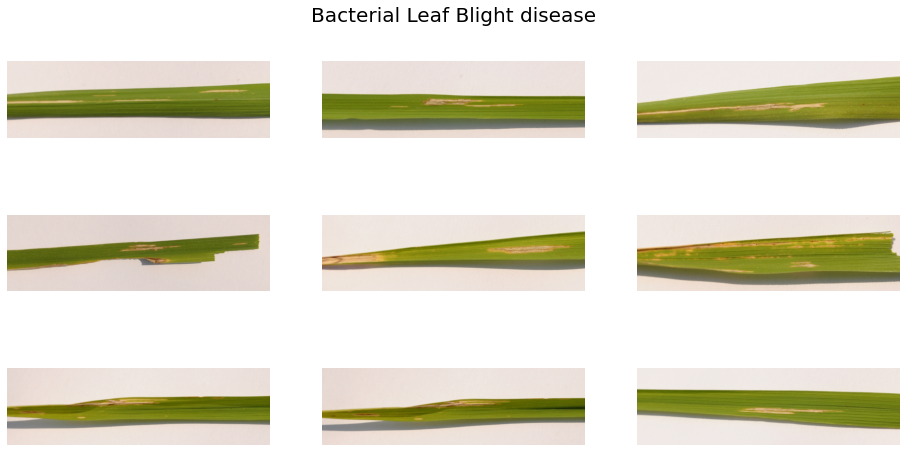

In [18]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_bacterial_pix = [os.path.join(train_bacterial_dir, fname) 
                for fname in train_bacterial_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_bacterial_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Bacterial Leaf Blight disease", pad = 40, fontsize = 20)

plt.show()

In [19]:
pic_index = 0

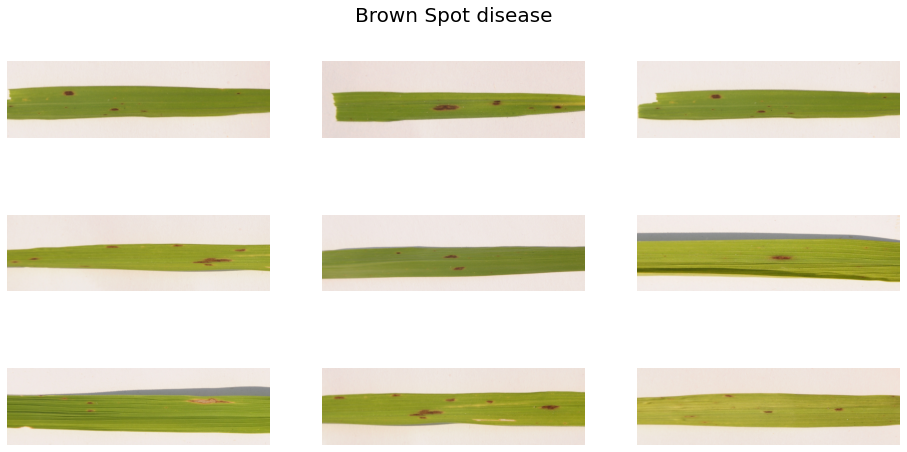

In [20]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_brown_pix = [os.path.join(train_brown_dir, fname) 
                for fname in train_brown_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_brown_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Brown Spot disease", pad = 40, fontsize = 20)

plt.show()

In [21]:
pic_index = 0

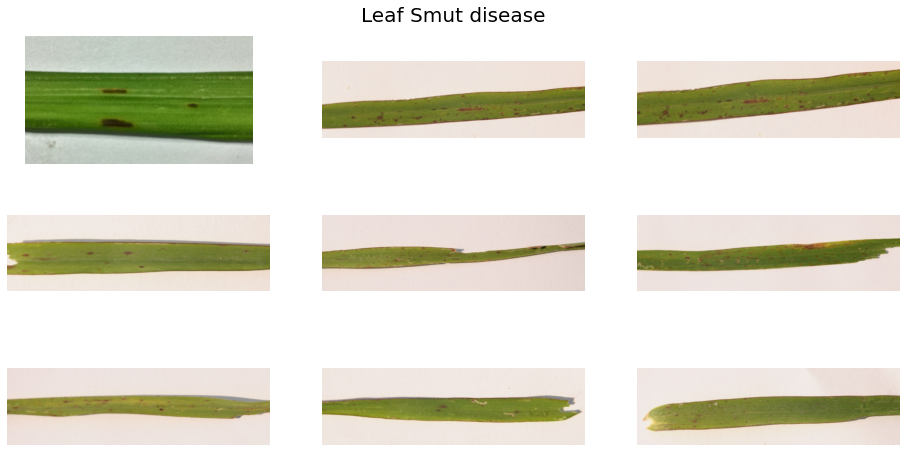

In [22]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(16, 8)

pic_index += 9
next_leaf_pix = [os.path.join(train_leaf_dir, fname) 
                for fname in train_leaf_names[pic_index-9:pic_index]]

for i, img_path in enumerate(next_leaf_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  if (i + 1 == 2):
    plt.title("Leaf Smut disease", pad = 40, fontsize = 20)

plt.show()

**Data Augmentation**

In [23]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=20,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.1,
        fill_mode="nearest")

In [25]:
import tensorflow_hub as hub

print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)

• Using TensorFlow Hub Version:  0.12.0


In [26]:
do_fine_tuning = False #@param {type:"boolean"}

In [27]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning,
                                   name="MobileNetV2",)

**Building Model**

In [28]:
import tensorflow as tf

print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(256, activation='relu', name='Fully_Connected_Layer'),
        tf.keras.layers.Dropout(0.5, name='Dropout_Layer'),
        tf.keras.layers.Dense(3, activation='softmax', name='Output_Layer')
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobileNetV2 (KerasLayer)    (None, 1280)              2257984   
                                                                 
 Fully_Connected_Layer (Dens  (None, 256)              327936    
 e)                                                              
                                                                 
 Dropout_Layer (Dropout)     (None, 256)               0         
                                                                 
 Output_Layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 2,586,691
Trainable params: 328,707
Non-trainable params: 2,257,984
_________________________________________________________________


In [29]:
#@title (Optional) Unfreeze some layers
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
    feature_extractor.trainable = True
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [30]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.7 MB/s 


In [31]:
import keras
import tensorflow_addons as tfa

METRICS = [
      'accuracy',
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      tfa.metrics.F1Score(num_classes=3)
]

if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=METRICS)
else:
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=METRICS)

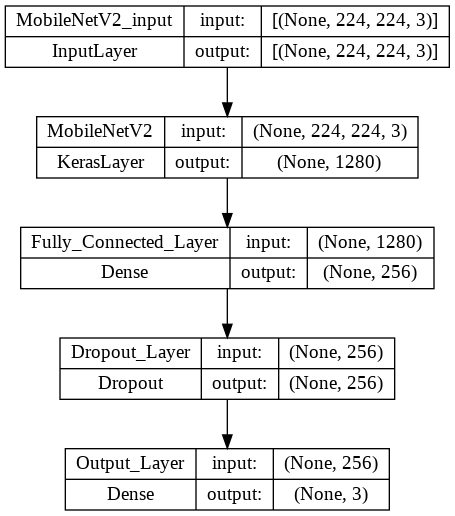

In [32]:
# plot the model including the sizes of the model
tf.keras.utils.plot_model(model, show_shapes=True)

**Training and Testing Model**

In [33]:
# Train the model.
history = model.fit(
            datagen.flow(train_x, train_y, batch_size=8),
            validation_data = (test_x, test_y),
            epochs = 50)

Epoch 1/50
12/12 [==============================] - 13s 174ms/step - loss: 1.1061 - accuracy: 0.5938 - precision: 0.6163 - recall: 0.5521 - f1_score: 0.5969 - val_loss: 0.5347 - val_accuracy: 0.7083 - val_precision: 0.7727 - val_recall: 0.7083 - val_f1_score: 0.6990
Epoch 2/50
12/12 [==============================] - 1s 86ms/step - loss: 0.6650 - accuracy: 0.7604 - precision: 0.7604 - recall: 0.7604 - f1_score: 0.7604 - val_loss: 0.4463 - val_accuracy: 0.7917 - val_precision: 0.7917 - val_recall: 0.7917 - val_f1_score: 0.7816
Epoch 3/50
12/12 [==============================] - 1s 91ms/step - loss: 0.4656 - accuracy: 0.8542 - precision: 0.8526 - recall: 0.8438 - f1_score: 0.8532 - val_loss: 0.2443 - val_accuracy: 0.9167 - val_precision: 0.9091 - val_recall: 0.8333 - val_f1_score: 0.9165
Epoch 4/50
12/12 [==============================] - 1s 86ms/step - loss: 0.3992 - accuracy: 0.8646 - precision: 0.8804 - recall: 0.8438 - f1_score: 0.8636 - val_loss: 0.2565 - val_accuracy: 0.9167 - val_

In [34]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

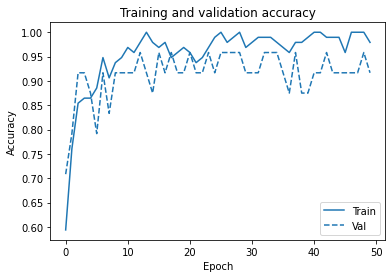

<Figure size 432x288 with 0 Axes>

In [35]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, color=colors[0], label='Train')
plt.plot(epochs, val_acc, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

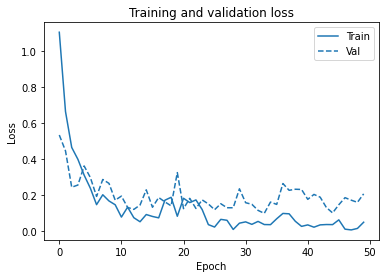

<Figure size 432x288 with 0 Axes>

In [36]:
loss      = history.history['loss']
val_loss  = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, color=colors[0], label='Train')
plt.plot(epochs, val_loss, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

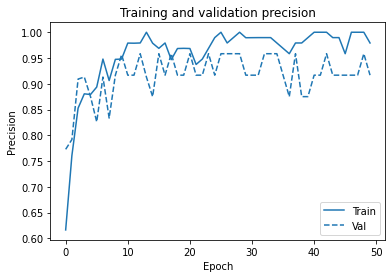

<Figure size 432x288 with 0 Axes>

In [37]:
precision      = history.history['precision']
val_precision  = history.history['val_precision']

epochs   = range(len(precision))

plt.plot(epochs, precision, color=colors[0], label='Train')
plt.plot(epochs, val_precision, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training and validation precision')
plt.legend(loc=0)
plt.figure()
plt.show()

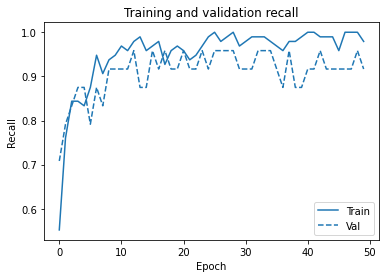

<Figure size 432x288 with 0 Axes>

In [38]:
recall      = history.history['recall']
val_recall  = history.history['val_recall']

epochs   = range(len(recall))

plt.plot(epochs, recall, color=colors[0], label='Train')
plt.plot(epochs, val_recall, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training and validation recall')
plt.legend(loc=0)
plt.figure()
plt.show()

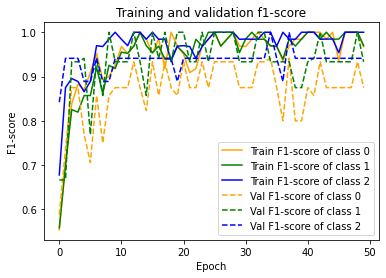

<Figure size 864x864 with 0 Axes>

In [39]:
from itertools import cycle

f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']
f1_numpy = np.array(f1_score)
val_f1_numpy = np.array(val_f1_score)

epochs   = range(len(f1_score))

n_classes = 3
colors = cycle(['orange', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(epochs, f1_numpy[:, i], color=color,
            label='Train F1-score of class {0}'.format(i))
for i, color in zip(range(n_classes), colors):
    plt.plot(epochs, val_f1_numpy[:, i], color=color,
            linestyle="--", 
            label='Val F1-score of class {0}'.format(i))

#plt.plot(epochs, f1_score, color=colors[0], label='Train')
#plt.plot(epochs, val_f1_score, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.title('Training and validation f1-score')
plt.legend(loc=0)
plt.figure(figsize=(12,12))
plt.show()

1/1 [==============================] - 1s 930ms/step


Text(0.5, 1.0, 'Confusion Matrix')

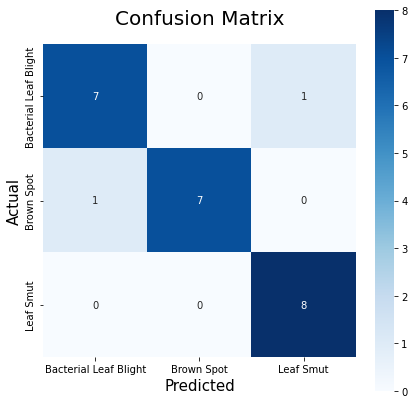

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

disease_types = ["Bacterial Leaf Blight", "Brown Spot", "Leaf Smut"]
Y_pred = model.predict(test_x)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(test_y, axis=1)

fig, ax = plt.subplots(figsize=(7,7))
cm = confusion_matrix(Y_true, Y_pred)
#plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, 
                 square=True, xticklabels=disease_types, 
                 yticklabels=disease_types, ax=ax)
ax.set_ylabel('Actual', fontsize=15)
ax.set_xlabel('Predicted', fontsize=15)
ax.set_title('Confusion Matrix', fontsize=20, pad=20)

In [41]:
Y_pred = model.predict(test_x)

1/1 [==============================] - 0s 27ms/step


In [42]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

n_classes = 3
lw = 2
Y_val = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


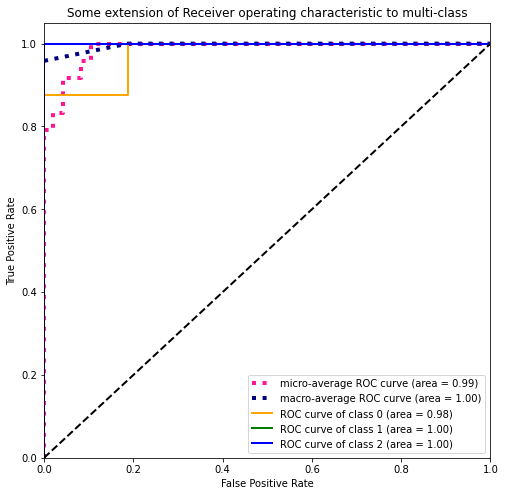

In [43]:
from scipy import interp

# FPertama-tama, gabungkan semua False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Kemudian interpolasi semua kurva ROC pada titik ini
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Terakhir, rata-rata dan hitung AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot semua kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['orange', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [44]:
def plot_metrics(history):
  metrics = ['accuracy', 'loss', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    fig = plt.gcf()
    fig.set_size_inches(12, 10)
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

Text(0.5, 1.0, 'Training and validation loss')

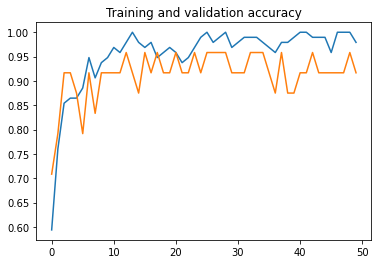

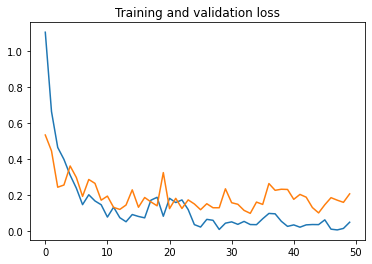

In [45]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc )
plt.plot(epochs, val_acc )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training and validation loss')

**Generate a SavedModel**

In [46]:
export_dir = 'content/saved_model/1'
tf.saved_model.save(model, export_dir)

In [47]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

In [48]:
def format_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return  image, label

In [49]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/rice_leaf_diseases/validation")

In [50]:
batch_size = 1
img_height = 224
img_width = 224

In [51]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [52]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

In [54]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [55]:
tflite_model_file = '/content/model.tflite'

In [56]:
with open(tflite_model_file, "wb") as f:
 f.write(tflite_model)

In [57]:
try:
    from google.colab import files
    files.download('/content/converted_model.tflite')
except:
    pass